#Optimal trade-off curve for a regularized least-squares problem


##Regularized least-squares

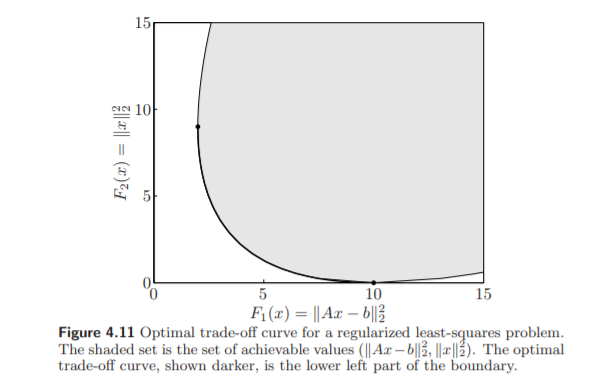

In [1]:
from pickle import load
from cvxopt import blas, lapack, matrix, solvers
solvers.options['show_progress'] = 0

data = load(open("/content/drive/MyDrive/Optimizacion_Convexa/03_Applications_to_modelling/rls.bin",'rb'))
A, b = data['A'], data['b']
m, n = A.size

FileNotFoundError: ignored

##LS Solution

In [ ]:
xls = +b
lapack.gels(+A, xls)
xls = xls[:n]

We compute the optimal values of:

\begin{array}{c}
\min / \max \|A x-b\|_{2}^{2} \\
\text { S.t. } x^{\prime} x=\alpha
\end{array}
Via duals.


Lower bound:
\begin{array}{l}
\text { maximize }-t-U \alpha \\
\text { S.T. }[u I, 0 ; 0, T]-[A, b]^{\prime}[A, b] \geq 0
\end{array}

Upper bound:
\begin{aligned}
\text { minimize } & t+v \alpha \\
\text { S.T. } &[u I, 0 ; 0, T]-[A, b]^{\prime}[A, b] \geq 0
\end{aligned}

two variables(t,u)


In [ ]:
G = matrix(0.0, ((n+1)**2, 2))
G[-1, 0] = -1.0    # coefficient of t
G[: (n+1)**2-1 : n+2, 1] = -1.0    # coefficient of u
h = matrix( [ [ A.T * A,  b.T * A ], [ A.T * b, b.T * b ] ] )
c = matrix(1.0, (2,1))

nopts = 40
alpha1 = [2.0/(nopts//2-1) * alpha for alpha in range(nopts//2) ] + \
    [ 2.0 + (15.0 - 2.0)/(nopts//2) * alpha for alpha in
        range(1,nopts//2+1) ]
lbnds = [ blas.nrm2(b)**2 ]
for alpha in alpha1[1:]:
    c[1:] = alpha
    lbnds += [ -blas.dot(c, solvers.sdp(c, Gs=[G], hs=[h])['x']) ]

nopts = 10
alpha2 = [ 1.0/(nopts-1) * alpha for alpha in range(nopts) ]
ubnds = [ blas.nrm2(b)**2 ]
for alpha in alpha2[1:]:
    c[1:] = alpha
    ubnds += [ blas.dot(c, solvers.sdp(c, Gs=[G], hs=[-h])['x']) ]

We can scalarize this problem by taking $\lambda_{1}>0$ and $\lambda_{2}>0$ and minimizing the scalar weighted sum objective
$$
\begin{aligned}
\lambda^{T} f_{0}(x) &=\lambda_{1} F_{1}(x)+\lambda_{2} F_{2}(x) \\
&=x^{T}\left(\lambda_{1} A^{T} A+\lambda_{2} I\right) x-2 \lambda_{1} b^{T} A x+\lambda_{1} b^{T} b
\end{aligned}
$$

which yields
$$
x(\mu)=\left(\lambda_{1} A^{T} A+\lambda_{2} I\right)^{-1} \lambda_{1} A^{T} b=\left(A^{T} A+\mu I\right)^{-1} A^{T} b
$$
where $\mu=\lambda_{2} / \lambda_{1}$. For any $\mu>0,$ this point is Pareto optimal for the bi-criterion problem. We can interpret $\mu=\lambda_{2} / \lambda_{1}$ as the relative weight we assign $F_{2}$ compared to $F_{1}$.

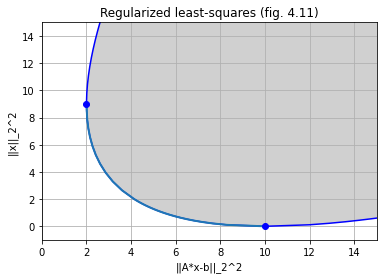

In [ ]:
try: import pylab
except ImportError: pass
else:
    pylab.figure(1, facecolor='w')
    pylab.plot(lbnds, alpha1, 'b-', ubnds, alpha2, 'b-')
    kmax = max([ k for k in range(len(alpha1)) if alpha1[k] <
        blas.nrm2(xls)**2 ])
    pylab.plot( [ blas.nrm2(b)**2 ] + lbnds[:kmax] +
        [ blas.nrm2(A*xls-b)**2 ], [0.0] + alpha1[:kmax] +
        [ blas.nrm2(xls)**2 ], '-', linewidth=2)
    pylab.plot([ blas.nrm2(b)**2, blas.nrm2(A*xls-b)**2 ],
        [0.0, blas.nrm2(xls)**2], 'bo')
    pylab.fill(lbnds[-1::-1] + ubnds + [ubnds[-1]],
        alpha1[-1::-1] + alpha2+ [alpha1[-1]], facecolor = '#D0D0D0')
    pylab.axis([0, 15, -1.0, 15])
    pylab.xlabel('||A*x-b||_2^2')
    pylab.ylabel('||x||_2^2')
    pylab.grid()
    pylab.title('Regularized least-squares (fig. 4.11)')
    pylab.show()

Figure 4.11 shows the optimal trade-off curve and the set of achievable values for a regularized least-squares problem with problem data $A \in \mathbf{R}^{100 \times 10}, b \in \mathbf{R}^{100}$.

## References

* Original problem formulation:
  - S. Boyd, S.P. Boyd, and L. Vandenberghe, Chapter 4. Convex Optimization. Cambridge University Press, New York, 2004.